In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler
from sklearn.mixture import GaussianMixture
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from timeit import timeit
from sklearn.metrics import silhouette_score
from matplotlib.image import imread


In [2]:
iris_data = load_iris(as_frame=True)
data = iris_data.frame
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [3]:
# let's use RandomForestClassifier to detect feature importance
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feature_importances

petal length (cm)    0.436130
petal width (cm)     0.436065
sepal length (cm)    0.106128
sepal width (cm)     0.021678
dtype: float64

In [4]:
X_train = X[['petal length (cm)', 'petal width (cm)']]

In [5]:
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [6]:
kmeans_clstr = KMeans(n_clusters=3, random_state=42)
kmeans_clstr.fit(X_train)
kmeans_labels = kmeans_clstr.labels_

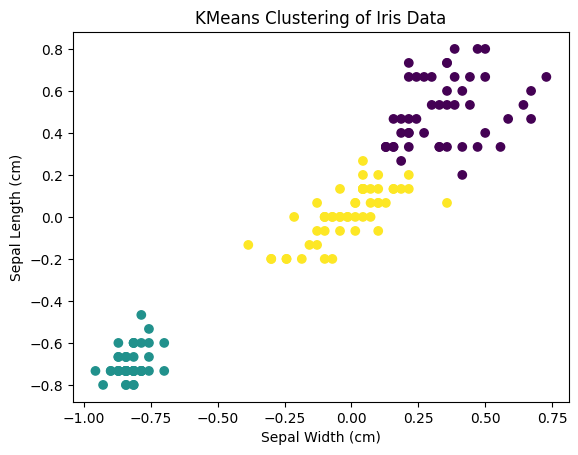

In [7]:
# let's visualize the clusters
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('KMeans Clustering of Iris Data')
plt.show()

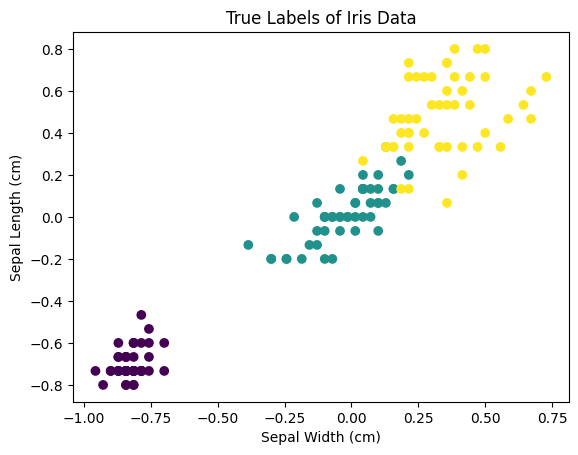

In [8]:
# and compare with the real labels
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('True Labels of Iris Data')
plt.show()

In [9]:
kmeans_clstr.cluster_centers_

array([[ 0.34761905,  0.50416667],
       [-0.82514286, -0.70266667],
       [-0.01538462,  0.01666667]])

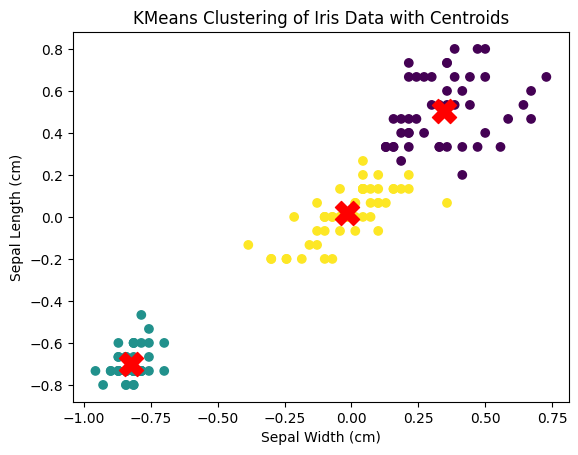

In [10]:
# let's visualize the clusters with centroids
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_clstr.cluster_centers_[:, 0], kmeans_clstr.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('KMeans Clustering of Iris Data with Centroids')
plt.show()

In [11]:
# let's check soft clustering ( distance to centroids)
distances = kmeans_clstr.transform(X_train)

# let's calculate the probabilities of belonging to each cluster
probabilities = np.exp(-distances) / np.sum(np.exp(-distances), axis=1, keepdims=True)
probabilities

array([[0.121985  , 0.65566058, 0.22235442],
       [0.121985  , 0.65566058, 0.22235442],
       [0.12203722, 0.65582469, 0.22213808],
       [0.12329558, 0.65166454, 0.22503988],
       [0.121985  , 0.65566058, 0.22235442],
       [0.14218849, 0.59941728, 0.25839424],
       [0.12629539, 0.64435964, 0.22934497],
       [0.12329558, 0.65166454, 0.22503988],
       [0.121985  , 0.65566058, 0.22235442],
       [0.12452913, 0.64760285, 0.22786802],
       [0.12329558, 0.65166454, 0.22503988],
       [0.12623671, 0.6430728 , 0.23069049],
       [0.12309857, 0.65188168, 0.22501975],
       [0.121932  , 0.65598193, 0.22208608],
       [0.12249425, 0.65486427, 0.22264147],
       [0.13716194, 0.61449306, 0.248345  ],
       [0.13455997, 0.62275912, 0.24268091],
       [0.12629539, 0.64435964, 0.22934497],
       [0.13412733, 0.62117631, 0.24469636],
       [0.1276936 , 0.6400454 , 0.232261  ],
       [0.12978034, 0.6327876 , 0.23743207],
       [0.13716194, 0.61449306, 0.248345  ],
       [0.

In [12]:
# we see 3 columns probabilities for each cluster, but we need to select max 2 probabilities
# let's sort the probabilities
sorted_probabilities = np.sort(probabilities, axis=1)[:, ::-1]
sorted_probabilities

array([[0.65566058, 0.22235442, 0.121985  ],
       [0.65566058, 0.22235442, 0.121985  ],
       [0.65582469, 0.22213808, 0.12203722],
       [0.65166454, 0.22503988, 0.12329558],
       [0.65566058, 0.22235442, 0.121985  ],
       [0.59941728, 0.25839424, 0.14218849],
       [0.64435964, 0.22934497, 0.12629539],
       [0.65166454, 0.22503988, 0.12329558],
       [0.65566058, 0.22235442, 0.121985  ],
       [0.64760285, 0.22786802, 0.12452913],
       [0.65166454, 0.22503988, 0.12329558],
       [0.6430728 , 0.23069049, 0.12623671],
       [0.65188168, 0.22501975, 0.12309857],
       [0.65598193, 0.22208608, 0.121932  ],
       [0.65486427, 0.22264147, 0.12249425],
       [0.61449306, 0.248345  , 0.13716194],
       [0.62275912, 0.24268091, 0.13455997],
       [0.64435964, 0.22934497, 0.12629539],
       [0.62117631, 0.24469636, 0.13412733],
       [0.6400454 , 0.232261  , 0.1276936 ],
       [0.6327876 , 0.23743207, 0.12978034],
       [0.61449306, 0.248345  , 0.13716194],
       [0.

In [13]:
# select max 2 probabilities
top2_probabilities = sorted_probabilities[:, :2]
top2_probabilities

array([[0.65566058, 0.22235442],
       [0.65566058, 0.22235442],
       [0.65582469, 0.22213808],
       [0.65166454, 0.22503988],
       [0.65566058, 0.22235442],
       [0.59941728, 0.25839424],
       [0.64435964, 0.22934497],
       [0.65166454, 0.22503988],
       [0.65566058, 0.22235442],
       [0.64760285, 0.22786802],
       [0.65166454, 0.22503988],
       [0.6430728 , 0.23069049],
       [0.65188168, 0.22501975],
       [0.65598193, 0.22208608],
       [0.65486427, 0.22264147],
       [0.61449306, 0.248345  ],
       [0.62275912, 0.24268091],
       [0.64435964, 0.22934497],
       [0.62117631, 0.24469636],
       [0.6400454 , 0.232261  ],
       [0.6327876 , 0.23743207],
       [0.61449306, 0.248345  ],
       [0.65224235, 0.22408329],
       [0.57460418, 0.27389307],
       [0.61093328, 0.25172923],
       [0.6430728 , 0.23069049],
       [0.60771172, 0.25288203],
       [0.65166454, 0.22503988],
       [0.65566058, 0.22235442],
       [0.6430728 , 0.23069049],
       [0.

In [14]:
# since we remove 1 probability, we need to normalize the remaining 2 probabilities
top2_probabilities = top2_probabilities / np.sum(top2_probabilities, axis=1, keepdims=True)
top2_probabilities

array([[0.74675328, 0.25324672],
       [0.74675328, 0.25324672],
       [0.74698462, 0.25301538],
       [0.74331158, 0.25668842],
       [0.74675328, 0.25324672],
       [0.69877504, 0.30122496],
       [0.73750285, 0.26249715],
       [0.74331158, 0.25668842],
       [0.74675328, 0.25324672],
       [0.73971947, 0.26028053],
       [0.74331158, 0.25668842],
       [0.73598056, 0.26401944],
       [0.7433922 , 0.2566078 ],
       [0.74707417, 0.25292583],
       [0.74627919, 0.25372081],
       [0.71217658, 0.28782342],
       [0.71958668, 0.28041332],
       [0.73750285, 0.26249715],
       [0.71739915, 0.28260085],
       [0.7337392 , 0.2662608 ],
       [0.72715847, 0.27284153],
       [0.71217658, 0.28782342],
       [0.74429221, 0.25570779],
       [0.67720217, 0.32279783],
       [0.70819501, 0.29180499],
       [0.73598056, 0.26401944],
       [0.706154  , 0.293846  ],
       [0.74331158, 0.25668842],
       [0.74675328, 0.25324672],
       [0.73598056, 0.26401944],
       [0.

In [15]:
# Let's add flags border_cluster to all points with max probability < 0.55
border_cluster = np.max(top2_probabilities, axis=1) < 0.55

In [16]:
# let's add border_cluster to X_train
X_train['border_cluster'] = border_cluster
X_train['kmeans_labels'] = kmeans_labels
X_train['true_labels'] = y.values


In [17]:
X_train.head(5)

,petal length (cm),petal width (cm),border_cluster,kmeans_labels,true_labels
0,-0.842857,-0.733333,False,1,0
1,-0.842857,-0.733333,False,1,0
2,-0.871429,-0.733333,False,1,0
3,-0.814286,-0.733333,False,1,0
4,-0.842857,-0.733333,False,1,0


In [18]:
# count of border_cluster in the dataset
X_train['border_cluster'].value_counts()

border_cluster
False    136
True      14
Name: count, dtype: int64

In [19]:
# percentage of border_cluster in the dataset
X_train['border_cluster'].value_counts() / len(X_train)

border_cluster
False    0.906667
True     0.093333
Name: count, dtype: float64

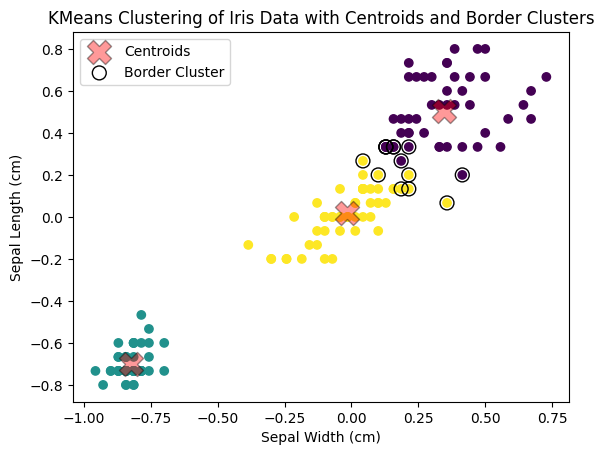

In [20]:
# let's visualize the clusters with centroids and border_cluster
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_clstr.cluster_centers_[:, 0], kmeans_clstr.cluster_centers_[:, 1], s=300, c='red', marker='X', edgecolors='black', label='Centroids', alpha=0.4)
plt.scatter(X_train[border_cluster].iloc[:, 0], X_train[border_cluster].iloc[:, 1], s=100, facecolors='none', edgecolors='black', label='Border Cluster')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('KMeans Clustering of Iris Data with Centroids and Border Clusters')
plt.legend()
plt.show()

In [21]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

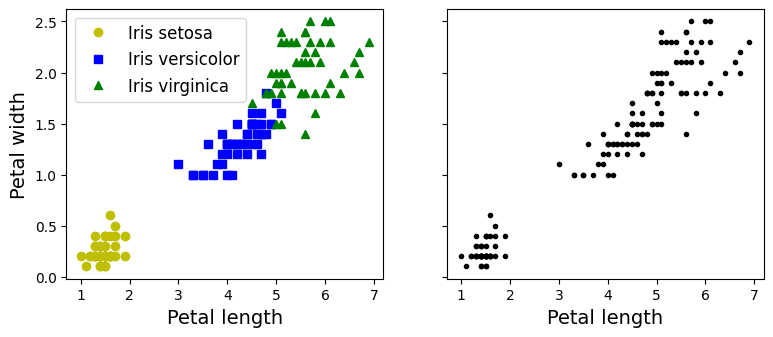

In [22]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

A Gaussian mixture model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [23]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit_predict(X)

Let's map each cluster to a class.

Instead of hard coding the mapping (as is done in the book, for simplicity), we will pick the most common class for each cluster (using the scipy.stats.mode() function):

In [24]:
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y == class_id], keepdims=True)
    mapping[mode.item()] = class_id

mapping

{1: np.int64(0), 2: np.int64(1), 0: np.int64(2)}

In [25]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

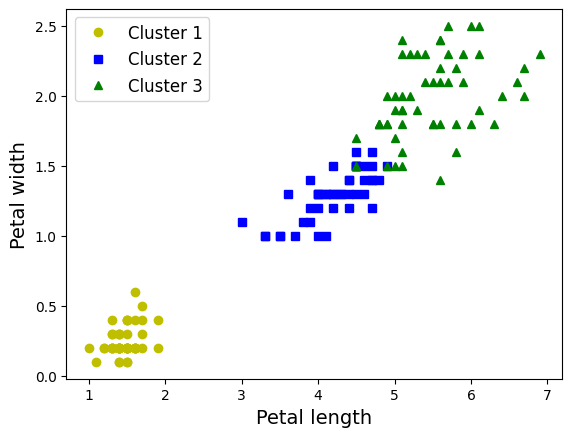

In [26]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [27]:
np.sum(y_pred==y)

np.int64(145)

In [28]:
np.sum(y_pred==y) / len(y_pred)

np.float64(0.9666666666666667)

Note: the results in this notebook may differ slightly from the book. This is because algorithms can sometimes be tweaked a bit between Scikit-Learn versions.

Fit and predict

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [43]:
X, y = make_blobs(n_samples=2000, random_state=7, centers=6)

In [44]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

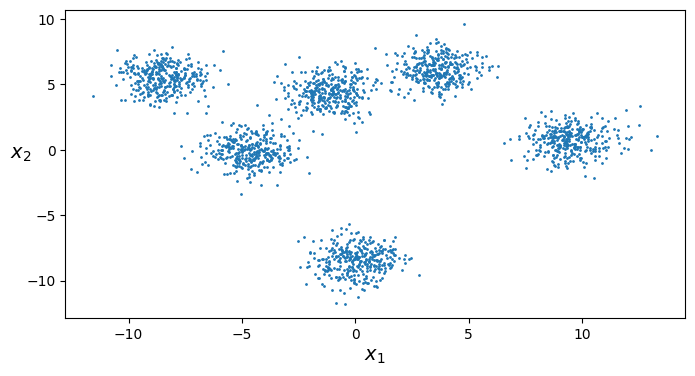

In [45]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [46]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [47]:
y_pred

array([4, 0, 4, ..., 1, 4, 0], shape=(2000,), dtype=int32)

In [22]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

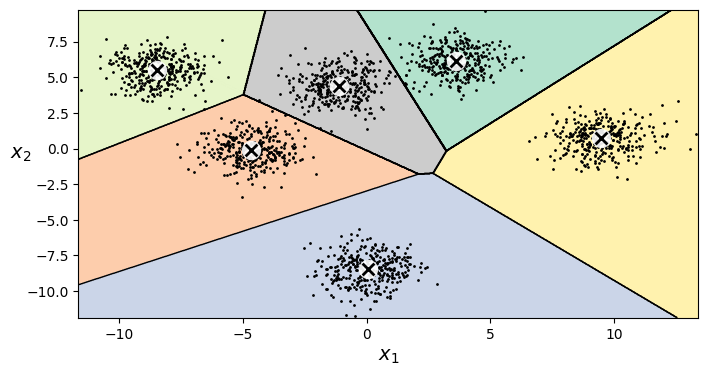

In [49]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

## The K-Means Algorithm

The KMeans class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set init="random", n_init=1and algorithm="full". These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [58]:
kmeans_iter1 = KMeans(n_clusters=6, init="random", n_init=1,
                     max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=6, init="random", n_init=1,
                     max_iter=3, random_state=0)
kmeans_iter3 = KMeans(n_clusters=6, init="random", n_init=1,
                     max_iter=20, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

,n_clusters,6
,init,'random'
,n_init,1
,max_iter,20
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


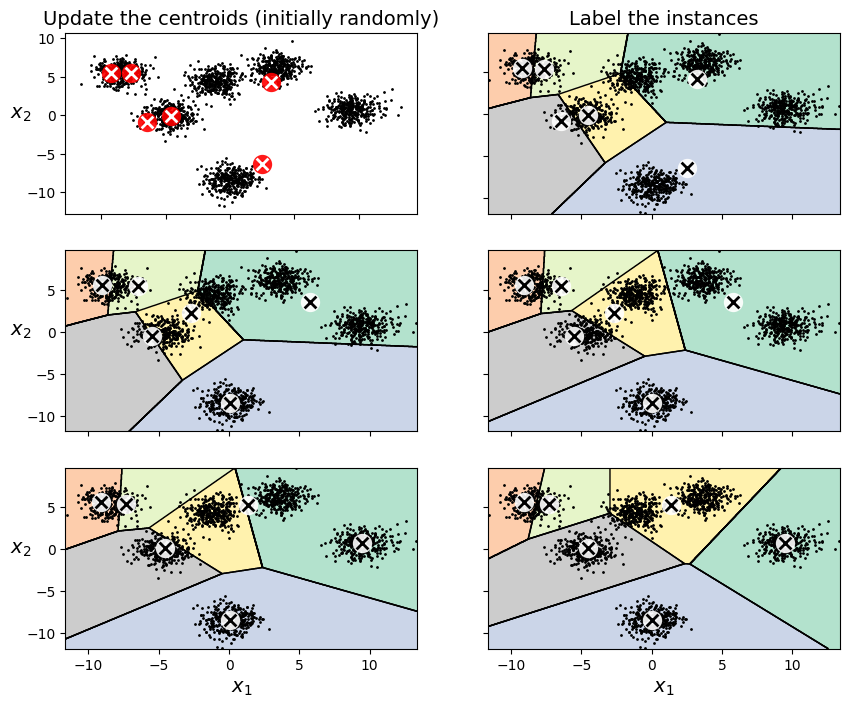

In [59]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [60]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

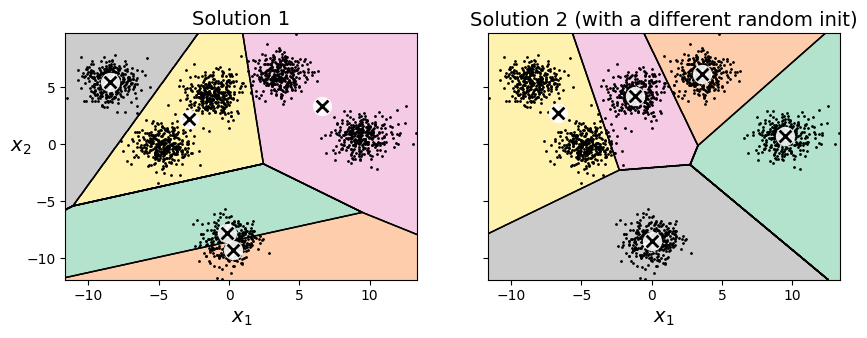

In [62]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

**Inertia**

- To select the best model, we will need a way to evaluate a K-Mean model's performance.
- Unfortunately, clustering is an unsupervised task, so we do not have the targets.
- But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [63]:
kmeans.inertia_

3874.647379108487

In [64]:
# As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

np.float64(3874.6473791084854)

**Multiple Initializations**

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [65]:
kmeans_rnd_init1.inertia_

19676.003996558426

In [66]:
kmeans_rnd_init2.inertia_

11461.26723678636

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.

In [67]:
kmeans_rnd_10_inits = KMeans(n_clusters=6, init="random", n_init=10, random_state=2)
kmeans_rnd_10_inits.fit(X)

,n_clusters,6
,init,'random'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,2
,copy_x,True
,algorithm,'lloyd'


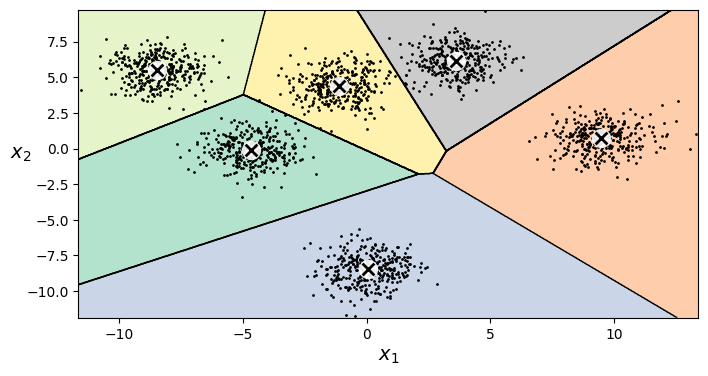

In [68]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [69]:
kmeans_rnd_10_inits.inertia_

3874.647379108487

**Algorithm**

To use Elkan's variant of K-Means, just set algorithm="elkan".
Note that it does not support sparse data, so by default, Scikit-Learn uses "elkan" for dense data, and "full" (the regular K-Means algorithm) for sparse data.

**Centroid initialization methods**

To set the initialization to K-Means++, simply set init="k-means++" (this is actually the default)

## Mini-Batch K-Means

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches

In [72]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=6, random_state=42)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

3876.015533686103

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import fetch_openml

# If the dataset does not fit in memory, the simplest option is to use the memmap class, just like we did for incremental PCA in the previous chapter.

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

# Next, let's write it to a memmap:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

np.random.seed(42)


k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

# Mini-batch K-Means is much faster than regular K-Means
# That's much faster! However, its performance is often lower (higher inertia), and it keeps degrading as k increases.
# Let's plot the inertia ratio and the training time ratio between Mini-batch K-Means and regular K-Means

In [74]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

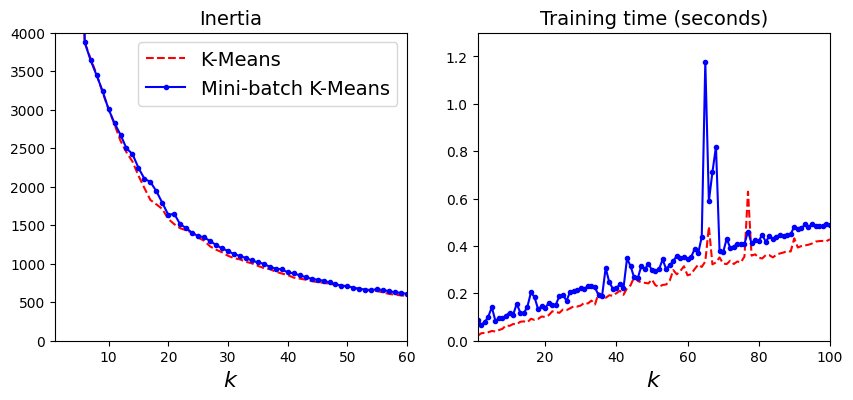

In [90]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 60, 0, 4000])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 1.3])

plt.show()

Finding the optimal number of clusters
What if the number of clusters was set to a lower or greater value than 5?

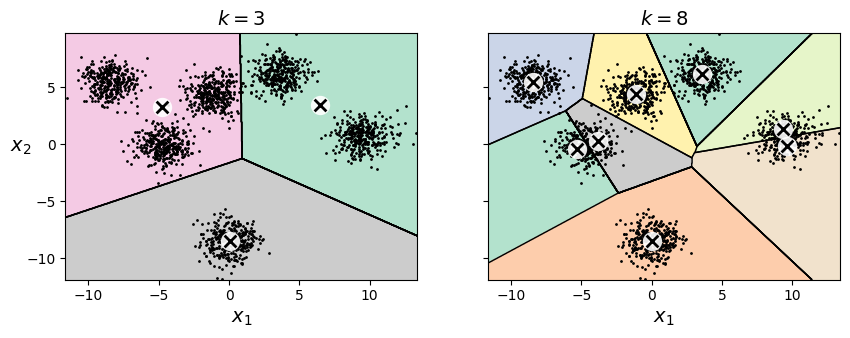

In [92]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [93]:
kmeans_k3.inertia_

29314.145584169986

In [94]:
kmeans_k8.inertia_

3460.1618444941973

No, we cannot simply take the value of
 that minimizes the inertia, since it keeps getting lower as we increase
. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of
 and analyze the resulting curve:

In [95]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

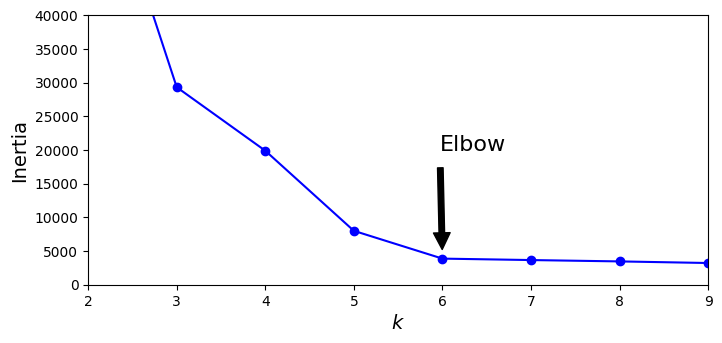

In [111]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(6, inertias[6]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([2, 9, 0, 40000])
plt.show()

### Silhouette Score

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to
 where
 is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and
 is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes
, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [113]:
silhouette_score(X, kmeans.labels_)

0.7171180554026028

In [114]:
silhouette_scores = [silhouette_score(X, model.labels_) # higher = better
                     for model in kmeans_per_k[1:]]

In [138]:
silhouette_scores

[0.4295869063152169,
 0.5766940281063299,
 0.5765864415141644,
 0.6716835806173,
 0.7171180554026028,
 0.6458375434665118,
 0.5697849964828029,
 0.4910892211753911]

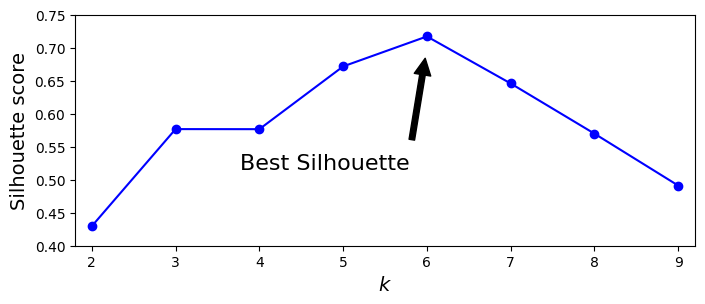

In [137]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.annotate('Best Silhouette',
             xy=(6, 0.7),
             xytext=(0.3, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
             )
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 9.2, 0.4, 0.75])
plt.show()

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram:

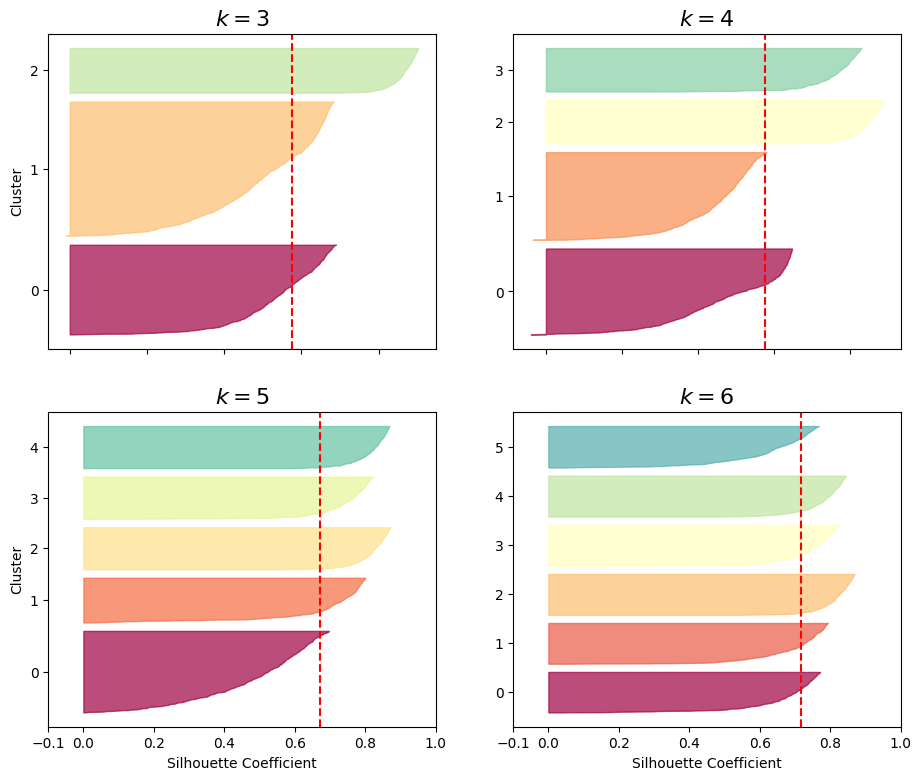

In [142]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

As you can see, looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

### Limits of K-Means

In [143]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

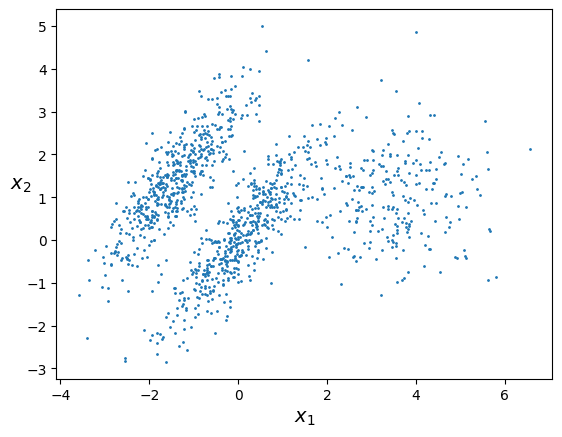

In [144]:
plot_clusters(X)

In [145]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


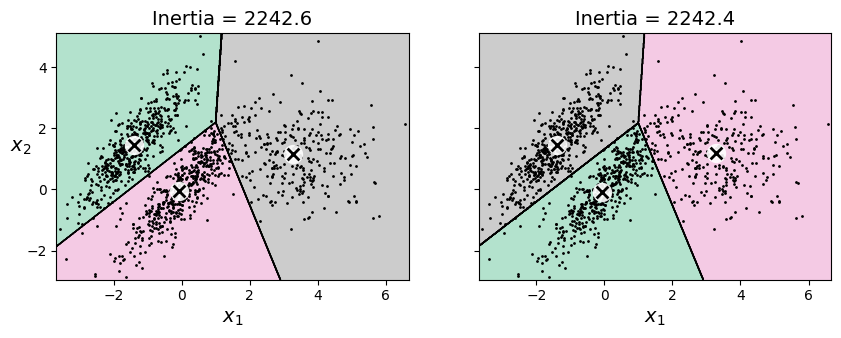

In [146]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## Using Clustering for Image Segmentation

In [2]:
import urllib
import os

PROJECT_ROOT_DIR = os.curdir

# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename


In [ ]:
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

In [3]:
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [4]:
X = image.reshape(-1, 3)

In [5]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [6]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

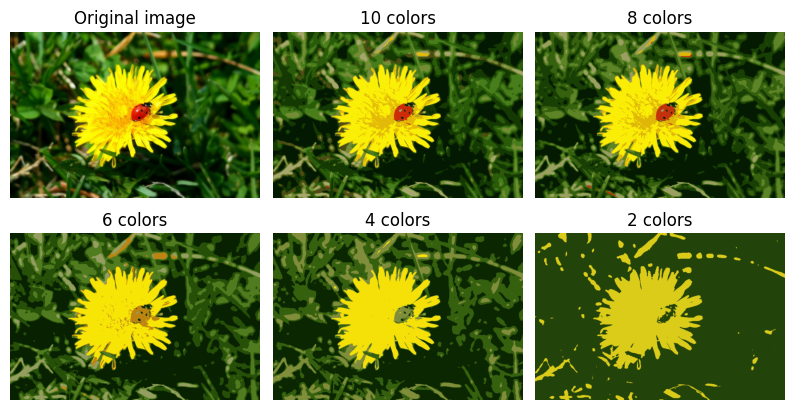

In [153]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## Using Clustering for Preprocessing

- Let's tackle the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)


C:\Users\username\Projects\MachineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,5000
,multi_class,'ovr'


In [9]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

Okay, that's our baseline: 96.89% accuracy.
 Let's see if we can do better by using K-Means as a preprocessing step.
 We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:

In [10]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr",
                                   solver="lbfgs",
                                   max_iter=5000,
                                   random_state=42)),
])
pipeline.fit(X_train, y_train)

C:\Users\username\Projects\MachineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('kmeans', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_clusters,50
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42


In [11]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.98

How much did the error rate drop?

In [12]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.3571428571428561

How about that? We reduced the error rate by over 35%! But we chose the number of clusters
 completely arbitrarily, we can surely do better. Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for
 is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of
 is simply the one that results in the best classification performance.

In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", OneVsRestClassifier(LogisticRegression(solver="lbfgs",
                                   max_iter=5000,
                                   random_state=42)),
                                   ),
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = RandomizedSearchCV(pipeline,
                              param_grid,
                              n_iter=20,
                              cv=cv,
                              verbose=1,
                              n_jobs=-1,
                              return_train_score=False)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,Pipeline(step..._state=42)))])
,param_distributions,"{'kmeans__n_clusters': range(2, 100)}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [20]:
grid_clf.best_params_

{'kmeans__n_clusters': 99}

In [21]:
grid_clf.score(X_test, y_test)

0.98

## Using Clustering for Semi-Supervised Learning

- Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

- Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [23]:
k = 50
n_labeled = 50

In [22]:
log_reg = OneVsRestClassifier(LogisticRegression(solver="lbfgs",
                                   max_iter=5000,
                                   random_state=42))
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [24]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Now let's plot these representative images and label them manually:

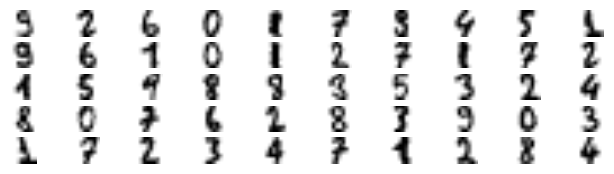

In [25]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8),
               cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [26]:
y_train[representative_digit_idx]

array([9, 2, 6, 0, 1, 7, 9, 4, 5, 1, 9, 6, 1, 0, 1, 2, 7, 1, 7, 2, 1, 5,
       9, 8, 8, 3, 5, 3, 2, 4, 8, 0, 7, 6, 2, 8, 3, 9, 0, 3, 1, 7, 2, 3,
       4, 7, 1, 2, 8, 4])

In [27]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 2, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [30]:
log_reg = OneVsRestClassifier(LogisticRegression(solver="lbfgs",
                                   max_iter=5000,
                                   random_state=42))

log_reg.fit(X_representative_digits, y_representative_digits)

log_reg.score(X_test, y_test)

C:\Users\username\Projects\MachineLearning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.11333333333333333

Wow! We jumped from 83.3% accuracy to 91.3%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [31]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [32]:
log_reg = OneVsRestClassifier(LogisticRegression(solver="lbfgs",
                                   max_iter=5000,
                                   random_state=42))

log_reg.fit(X_train, y_train_propagated)

,estimator,LogisticRegre...ndom_state=42)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42


In [33]:
log_reg.score(X_test, y_test)

0.08444444444444445

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 75th percentile closest to the centroid:

In [34]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [35]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [36]:
log_reg = OneVsRestClassifier(LogisticRegression(solver="lbfgs",
                                   max_iter=5000,
                                   random_state=42))
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

,estimator,LogisticRegre...ndom_state=42)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42


In [37]:
log_reg.score(X_test, y_test)

0.08

A bit better. With just 50 labeled instances (just 5 examples per class on average!), we got 92.7% performance, which is getting closer to the performance of logistic regression on the fully labeled digits dataset (which was 96.9%).

This is because the propagated labels are actually pretty good: their accuracy is close to 96%:

In [38]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

np.float64(0.10427010923535253)

You could now do a few iterations of active learning:

1. Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.
2. Train a new model with these additional labels.

## DBSCAN

In [14]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42) #

In [3]:
dbscan = DBSCAN(eps=0.1, min_samples=5, n_jobs=-1) #
dbscan.fit(X) #

,eps,0.1
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [4]:
dbscan.labels_[:10] #

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [5]:
len(dbscan.core_sample_indices_) #

992

In [6]:
dbscan.core_sample_indices_[:10] #

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952]])

In [10]:
np.unique(dbscan.labels_)

array([-1,  0,  1])

In [11]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

,eps,0.2
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [12]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

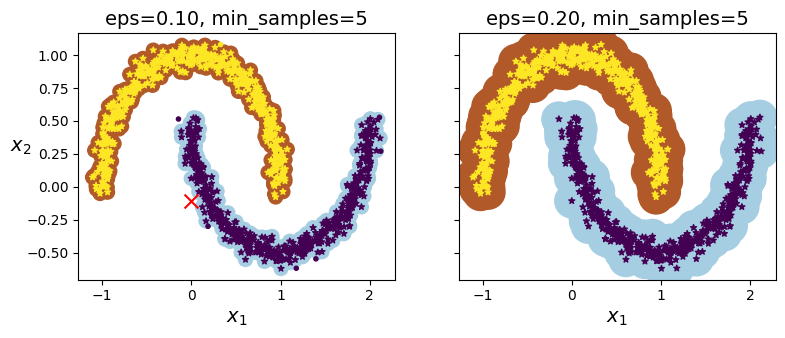

In [15]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [16]:
dbscan = dbscan2

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [20]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

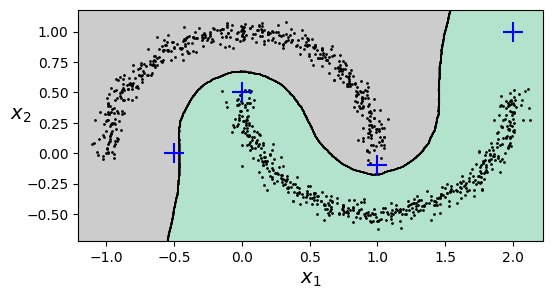

In [23]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [24]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

## Other Clustering Algorithms

In [25]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

,n_clusters,2
,eigen_solver,None
,n_components,None
,random_state,42
,n_init,10
,gamma,100
,affinity,'rbf'
,n_neighbors,10
,eigen_tol,'auto'
,assign_labels,'kmeans'
,degree,3


In [26]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

,n_clusters,2
,eigen_solver,None
,n_components,None
,random_state,42
,n_init,10
,gamma,1
,affinity,'rbf'
,n_neighbors,10
,eigen_tol,'auto'
,assign_labels,'kmeans'
,degree,3


In [27]:

np.percentile(sc1.affinity_matrix_, 95)

np.float64(0.04251990648936265)

In [28]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

C:\Users\username\AppData\Local\Temp\ipykernel_11032\1172981520.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)


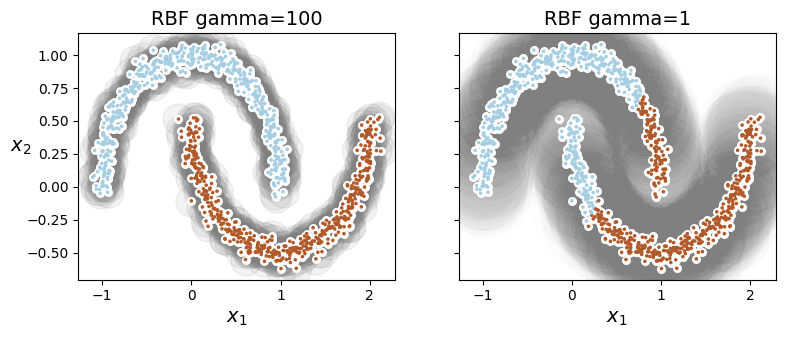

In [29]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

## Agglomerative Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [31]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

## Gaussian Mixtures

In [33]:
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [34]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

gm.weights_ # Let's look at the parameters that the EM algorithm estimated:

array([0.40005972, 0.20961444, 0.39032584])

In [35]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [36]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [37]:
gm.converged_ # Did the algorithm actually converge?

True

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use predict() method or the predict_proba() method:

In [38]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], shape=(1250,))

In [39]:
gm.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]], shape=(1250, 3))

In [40]:
# This is a generative model, so you can sample new instances from it (and get their labels):

X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [41]:
y_new

array([0, 0, 1, 1, 1, 2])

Notice that they are sampled sequentially from each cluster.

You can also estimate the log of the probability density function (PDF) at any location using the score_samples() method:

In [42]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953], shape=(1250,))

Let's check that the PDF integrates to 1 over the whole space.

 We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [43]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

np.float64(0.9999999999225093)

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [44]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

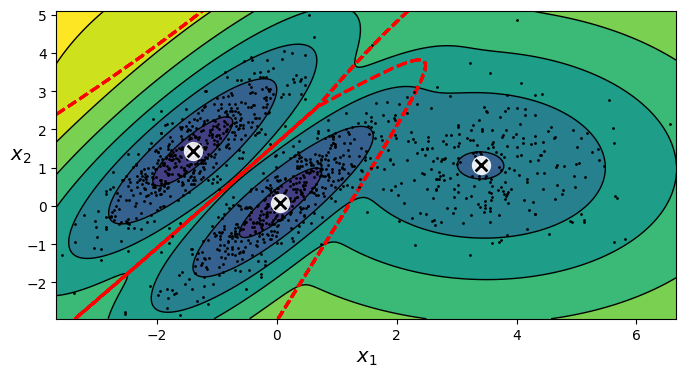

In [45]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)

plt.show()